# The Future of Software Industry

You would think that we might have developed enough software by now in 2019. It appears not. There is still massive growth in the software industry and tech analysts are spending even more time trying to fashion their predictions for and of the road ahead. So in what direction is the software industry heading, lets have a look through the **Stack Overflow 2019 Developer Survey Results**.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import collections as cl
from datetime import datetime

numpy and pandas to work with the Dataset.<br>
seaborn for Visualization of the data.<br>

Throughout this Code, I will try to find out the answer to the following questions.

### Questions!

- How many Developers are writing code for opensource?
- How much money do the Developers get throughout the globe?
- How much are the Developers satisfied with their jobs throughout the globe?
- What is the relation between the age of a developer and his work?
- What are the social media sites that the developers use?
- Which is the most popular Operating System among the Developers?
- Why do most of the Developers update their RESUME frequently?
- What are the platforms that the Developers had used extensively and what platforms do they want to use in future?
- What are the programming languages that the Developers had worked with and what languages do they want to use in future?
- What are the Database Servers that the Developers use to while coding and what Database Servers they want to use in future?
- What are the WebFrames that the Developers use and what WebFrame they want to use in future?
- Which type of work location is preferred by the Developers?

In [2]:
data = pd.read_csv('survey_results_public.csv')

In [3]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [5]:
desc = pd.read_csv('survey_results_schema.csv')
desc.values

array([['Respondent',
        'Randomized respondent ID number (not in order of survey response time)'],
       ['MainBranch',
        'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'],
       ['Hobbyist', 'Do you code as a hobby?'],
       ['OpenSourcer', 'How often do you contribute to open source?'],
       ['OpenSource',
        'How do you feel about the quality of open source software (OSS)?'],
       ['Employment',
        'Which of the following best describes your current employment status?'],
       ['Country', 'In which country do you currently reside?'],
       ['Student',
        'Are you currently enrolled in a formal, degree-granting college or university program?'],
       ['EdLevel',
        'Which of the following best describes the highest level of formal education that you’ve completed?'],
       ['UndergradMajor',
        'What was your main or most important field of study?'],
       ['EduOther',
  

#### For this Analysis, we need a few columns of this dataset where we will extract only the required data.

In [6]:
data.drop(columns={'Respondent','Hobbyist','Employment','Student','EdLevel','UndergradMajor','EduOther','OrgSize','DevType','YearsCode','Age1stCode','YearsCodePro','JobSat','MgrIdiot','MgrMoney','MgrWant','JobSeek','LastHireDate','LastInt','FizzBuzz','JobFactors','CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','WorkPlan','WorkChallenge','WorkRemote','ImpSyn','CodeRev','CodeRevHrs','UnitTests','PurchaseHow','PurchaseWhat','MiscTechWorkedWith','MiscTechDesireNextYear','DevEnviron','Containers','BlockchainOrg','BlockchainIs','BetterLife','ITperson','OffOn','Extraversion','ScreenName','SOVisit1st','SOVisitFreq','SOVisitTo','SOFindAnswer','SOTimeSaved','SOHowMuchTime','SOAccount','SOPartFreq','SOJobs','EntTeams','SOComm','WelcomeChange','OpenSource','SONewContent','Trans','Sexuality','Ethnicity','Dependents','SurveyLength','SurveyEase'},inplace = True)

In [7]:
data.head()

,MainBranch,OpenSourcer,Country,CareerSat,ResumeUpdate,ConvertedComp,WorkWeekHrs,WorkLoc,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,OpSys,SocialMedia,Age,Gender
0,I am a student who is learning to code,Never,United Kingdom,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Windows,Twitter,14.0,Man
1,I am a student who is learning to code,Less than once per year,Bosnia and Herzegovina,NaN,"Something else changed (education, award, medi...",NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,Windows,Instagram,19.0,Man
2,"I am not primarily a developer, but I write co...",Never,Thailand,Slightly satisfied,I was preparing for a job search,8820.0,40.0,Home,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,NaN,Other(s):,Linux-based,Reddit,28.0,Man
3,I am a developer by profession,Never,United States,Very satisfied,I was preparing for a job search,61000.0,80.0,Home,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,Windows,Reddit,22.0,Man
4,I am a developer by profession,Once a month or more often,Ukraine,Very dissatisfied,I was preparing for a job search,NaN,55.0,Office,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,Django;Express;Flask;jQuery;React.js;Spring,Flask;jQuery;React.js;Spring,Linux-based,Facebook,30.0,Man


In [8]:
data.shape

(88883, 20)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 20 columns):
MainBranch                88331 non-null object
OpenSourcer               88883 non-null object
Country                   88751 non-null object
CareerSat                 72847 non-null object
ResumeUpdate              77877 non-null object
ConvertedComp             55823 non-null float64
WorkWeekHrs               64503 non-null float64
WorkLoc                   70055 non-null object
LanguageWorkedWith        87569 non-null object
LanguageDesireNextYear    84088 non-null object
DatabaseWorkedWith        76026 non-null object
DatabaseDesireNextYear    69147 non-null object
PlatformWorkedWith        80714 non-null object
PlatformDesireNextYear    77443 non-null object
WebFrameWorkedWith        65022 non-null object
WebFrameDesireNextYear    62944 non-null object
OpSys                     87851 non-null object
SocialMedia               84437 non-null object
Age                      

In [10]:
data.describe()

,ConvertedComp,WorkWeekHrs,Age
count,5.582300e+04,64503.000000,79210.000000
mean,1.271107e+05,42.127197,30.336699
std,2.841523e+05,37.287610,9.178390
min,0.000000e+00,1.000000,1.000000
25%,2.577750e+04,40.000000,24.000000
50%,5.728700e+04,40.000000,29.000000
75%,1.000000e+05,44.750000,35.000000
max,2.000000e+06,4850.000000,99.000000


With an overall overview of the data, it is clear that there are various incompleteness with the data and they are as follows.

### Assessing The Data

Type Convertion
- MainBranch to Category type
- OpenSourcer to Category type as 'Yes' or 'No'.
- ResumeUpdate to Category type.
- CareerSat to category type as this contain only 5 type of string.
- WorkLoc to Category type as 'Office' or 'Home'.
- OpSys to Category type.
- Age to Integer type as age is always a whole number.
- Gender to Category type as 'Male' or 'Female'.

Quantity of incompleteness which needs to be sorted else it will hamper the analysis
- MainBranch Will remove all the empty data as Non-Developer.
- Country We don't have other option as to remove the entire row without Country column.
- WorkWeekHrs We will replace the empty entry with mean of that column.
- Gender We will take the empty entry as Transgender as they sometimes do not state their Gender.

### Cleaning The Data.

So now we know the datatypes of the columns and hence now we will be converting them to their required data tyes. 

#### Let's Start with MainBranch to Category type and from MainBranch we will remove all the empty data as Student.

In [11]:
data['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

In [12]:
MainBranch = []
for i in data['MainBranch']:
    if i == 'I am a developer by profession':
        MainBranch.append('Developer')
    elif i == 'I am a student who is learning to code':
        MainBranch.append('Student')
    elif i == 'I am not primarily a developer, but I write code sometimes as part of my work':
        MainBranch.append('Semi_Developer')
    elif i == 'I code primarily as a hobby':
        MainBranch.append('Hobby') 
    elif i == 'I used to be a developer by profession, but no longer am':
        MainBranch.append('Ex_Developer')
    else:
        MainBranch.append('Student')
data['MainBranch'] = MainBranch
data['MainBranch'] = data['MainBranch'].astype('category',inplace=True)

#### Converting ResumeUpdate to Category type.

In [13]:
data['ResumeUpdate'].value_counts()

I was preparing for a job search                                                33309
My job status changed (promotion, new job, etc.)                                13546
Something else changed (education, award, media, etc.)                          11986
I heard about a job opportunity (from a recruiter, online job posting, etc.)    11327
I had a negative experience or interaction at work                               6272
Re-entry into the workforce                                                      1437
Name: ResumeUpdate, dtype: int64

In [14]:
data['ResumeUpdate'] = data['ResumeUpdate'].astype('category')

#### Next is OpenSourcer to Category type as 'Yes' or 'No'.

In [15]:
data['OpenSourcer'].value_counts()

Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64

In [16]:
OpenSourcer = []
for i in data['OpenSourcer']:
    if (i == 'Never' ) or (i=='Less than once per year') or (i==''):
        OpenSourcer.append('No')
    else:
        OpenSourcer.append('Yes')
data['OpenSourcer'] = OpenSourcer
data['OpenSourcer'] = data['OpenSourcer'].astype('category')

#### Next we will convert CareerSat to category type.

In [17]:
data['CareerSat'].value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

In [18]:
data['CareerSat'] = data['CareerSat'].astype('category')

#### Next we will convert WorkLoc to Category type.

In [19]:
data['WorkLoc'].value_counts()

Office                                            40592
Home                                              23278
Other place, such as a coworking space or cafe     6185
Name: WorkLoc, dtype: int64

In [20]:
WorkLoc = []
for i in data['WorkLoc']:
    if i == 'Office':
        WorkLoc.append(i)
    elif i == 'Home':
        WorkLoc.append('Home')
    else:
        WorkLoc.append('Other')
data['WorkLoc'] = WorkLoc
data['WorkLoc'] = data['WorkLoc'].astype('category')

#### Now we will convert OpSys to Category type.

In [21]:
data['OpSys'].value_counts()

Windows        41714
MacOS          23541
Linux-based    22472
BSD              124
Name: OpSys, dtype: int64

In [22]:
data['OpSys'] = data['OpSys'].astype('category')

#### Next we will convert Age to Integer type as age is always a whole number.

In [23]:
Age = []
count = 0
for i in data['Age']:
    try:
        Age.append(int(i))
    except:
        Age.append(i)
        count += 1
data['Age'] = Age

#### Now it is time to convert Gender to Category type as 'Male' or 'Female' and we will take the empty entry as 'Transgender' as they sometimes do not prefer to state their Gender.

In [24]:
data['Gender'].value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [25]:
Gender = []
for i in data['Gender']:
    if (i=='Man') or (i== 'Man;Non-binary, genderqueer, or gender non-conforming'):
        Gender.append('Male')
    elif (i=='Woman') or (i=='Woman;Non-binary, genderqueer, or gender non-conforming') or (i=='Woman;Man;Non-binary, genderqueer, or gender non-conforming'):
        Gender.append('Female')
    else:
        Gender.append('Transgender')
data['Gender'] = Gender
data['Gender'] = data['Gender'].astype('category')

#### For Country, We don't have other option as to remove the entire row without Country column.

In [26]:
Country = data['Country'].value_counts().index
filters = []
for i in data['Country']:
    filters.append(i in Country)
    
data = data[filters]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88751 entries, 0 to 88882
Data columns (total 20 columns):
MainBranch                88751 non-null category
OpenSourcer               88751 non-null category
Country                   88751 non-null object
CareerSat                 72847 non-null category
ResumeUpdate              77877 non-null category
ConvertedComp             55823 non-null float64
WorkWeekHrs               64503 non-null float64
WorkLoc                   88751 non-null category
LanguageWorkedWith        87569 non-null object
LanguageDesireNextYear    84088 non-null object
DatabaseWorkedWith        76026 non-null object
DatabaseDesireNextYear    69147 non-null object
PlatformWorkedWith        80714 non-null object
PlatformDesireNextYear    77443 non-null object
WebFrameWorkedWith        65022 non-null object
WebFrameDesireNextYear    62944 non-null object
OpSys                     87851 non-null category
SocialMedia               84437 non-null object
Age          

In [28]:
data.shape

(88751, 20)

### 1. How many Developers are writing code for opensource?

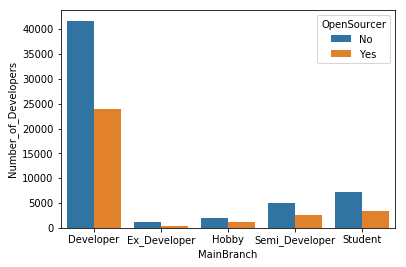

In [29]:
dev = data.groupby('MainBranch')['OpenSourcer'].value_counts()
dev = dev.to_frame('Number_of_Developers')
dev = dev.reset_index()
sns.barplot(x='MainBranch',y='Number_of_Developers',hue='OpenSourcer',data=dev)

### 2. How much money do the Developers get throughout the globe?

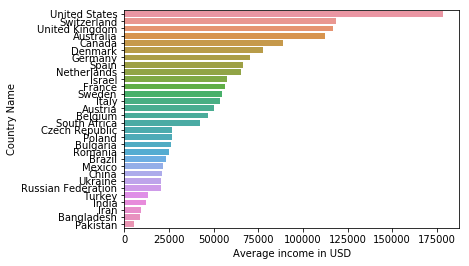

In [30]:
num = data['Country'].value_counts()[:30]
total = data.groupby('Country')['ConvertedComp'].sum()
data_plot1 = (total/num).sort_values(ascending=False)[:30]
data_plot = data_plot1.reset_index()
data_plot.rename(columns={0:'Average income in USD','index':'Country Name'},inplace=True)
sns.barplot(y='Country Name',x='Average income in USD',data = data_plot)

### 3. How much are the Developers satisfied with their jobs throughout the globe?

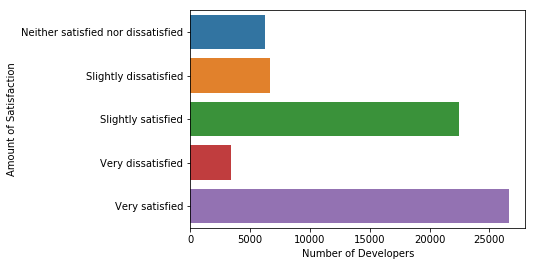

In [31]:
data_dev = data[data['MainBranch']=='Developer']
plot_data=data_dev['CareerSat'].value_counts().reset_index()
plot_data.rename(columns={'index':'Amount of Satisfaction','CareerSat':'Number of Developers'},inplace=True)
sns.barplot(y='Amount of Satisfaction',x='Number of Developers',data=plot_data)

### 4. What id the relation between the age of a developer and his work?

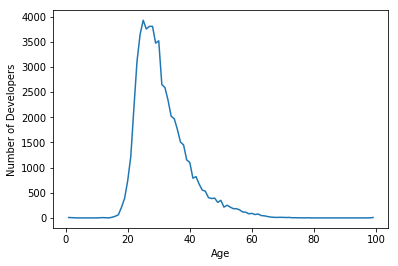

In [32]:
plot_data = data_dev['Age'].value_counts().reset_index()
plot_data.rename(columns={'index':'Age','Age':'Number of Developers'},inplace=True)
sns.lineplot(x='Age', y='Number of Developers', data=plot_data)

### 5. What are the social media sites that the developer uses?

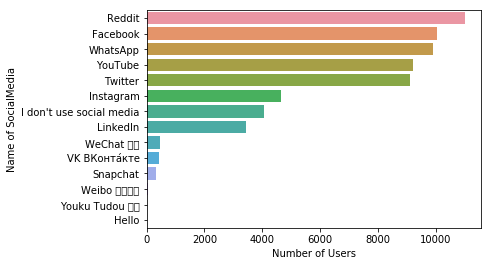

In [33]:
data_plot = data_dev['SocialMedia'].value_counts().reset_index()
data_plot.rename(columns={'index':'Name of SocialMedia','SocialMedia':'Number of Users'},inplace=True)
sns.barplot(x='Number of Users',y='Name of SocialMedia',data=data_plot)

### 6. Which is the most popular Operating System among the Developers?

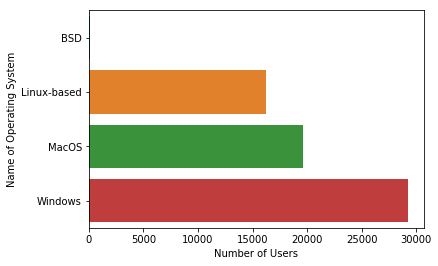

In [34]:
data_plot = data_dev['OpSys'].value_counts().reset_index()
data_plot.rename(columns={'index':'Name of Operating System','OpSys':'Number of Users'},inplace=True)
sns.barplot(x='Number of Users',y='Name of Operating System',data=data_plot)

### 7. Why do most of the Developers update their RESUME?

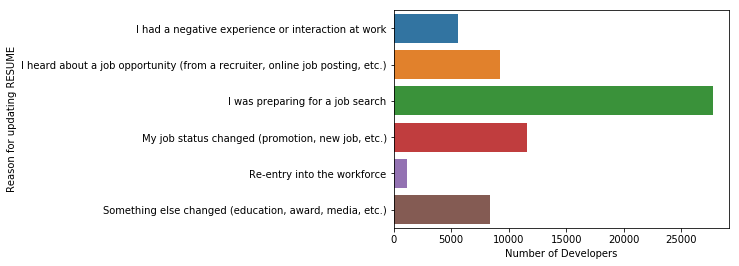

In [35]:
data_plot = data_dev['ResumeUpdate'].value_counts().reset_index()
data_plot.rename(columns={'index':'Reason for updating RESUME','ResumeUpdate':'Number of Developers'},inplace=True)
sns.barplot(x='Number of Developers',y='Reason for updating RESUME',data=data_plot)

In [36]:
def generate_word_column_for_the_column_of(column):
    column_name = column
    os_now_all_word = ''
    for i in data_dev[column_name]:
        try:
            a=i.split(';')
            for j in a:
                os_now_all_word+=' '+ j
        except:
            a=5

    cloud = WordCloud(background_color="white",max_font_size=250,width=960, height=1080).generate(os_now_all_word)

    cloud.to_file(column_name + '.png')
    plt.imshow(cloud)

###  8. What are the platforms that the developers had used extensively and what platforms do they want to use in Future?

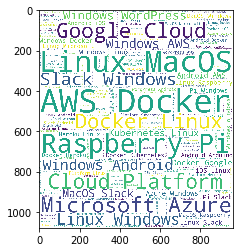

In [37]:
generate_word_column_for_the_column_of('PlatformWorkedWith')

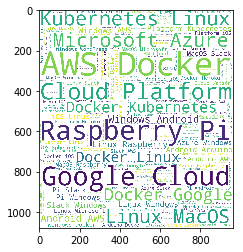

In [38]:
generate_word_column_for_the_column_of('PlatformDesireNextYear')

### 9. What are the programming languages that the developers had worked with and what languages do they want to use in Future?

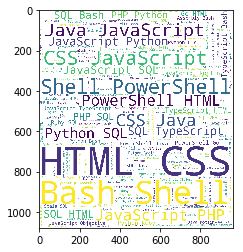

In [39]:
generate_word_column_for_the_column_of('LanguageWorkedWith')

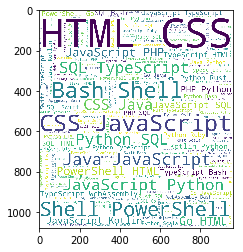

In [40]:
generate_word_column_for_the_column_of('LanguageDesireNextYear')

### 10. What are the Database Servers that the Developers use to while coding and what Database Servers do they want to use in Future?

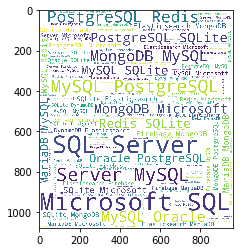

In [41]:
generate_word_column_for_the_column_of('DatabaseWorkedWith')

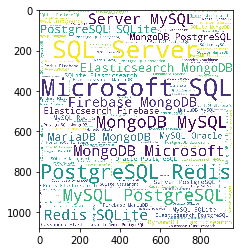

In [42]:
generate_word_column_for_the_column_of('DatabaseDesireNextYear')

### 11. What are the WebFrames that the Developers use and what WebFrame do they want to use in Future?

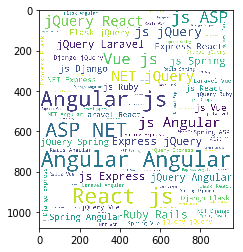

In [43]:
generate_word_column_for_the_column_of('WebFrameWorkedWith')

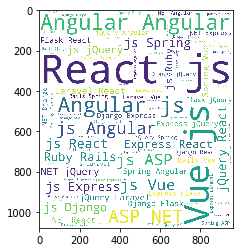

In [44]:
generate_word_column_for_the_column_of('WebFrameDesireNextYear')

### 12. Which type of work location is preferred by the Developers?

([<matplotlib.patches.Wedge at 0x20bc7c4c438>,
 [Text(-0.1994876782513622, 1.0817599854985769, 'Office'),
  Text(-0.22421819651525746, -1.0769058456297123, 'Home'),
  Text(1.018386258642903, -0.4157997453189577, 'Other')],
 [Text(-0.10881146086437937, 0.5900509011810419, '55.8%'),
  Text(-0.12230083446286769, -0.5874031885252975, '31.9%'),
  Text(0.5554834138052198, -0.2267998610830678, '12.3%')])

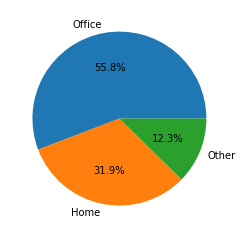

In [45]:
data_plot_number = data_dev['WorkLoc'].value_counts().values
data_plot_name = data_dev['WorkLoc'].value_counts().index 
plt.pie(data_plot_number,labels=data_plot_name,autopct='%1.1f%%',)

### This concludes my analysis, I have tried to answer all the mentioned questions and I think all those questions are more than enough for analysis in this dataset. Thank you everyone for going through the complete analysis.